# Fiduciary Fallacies: A Data-Driven delving into Dalliances and their Denouements

<img src="https://media-cldnry.s-nbcnews.com/image/upload/t_social_share_1200x630_center,f_auto,q_auto:best/newscms/2018_37/1366890/infidelity-today-main-180911.jpg">

### The Unspoken Code: Decoding the Psychology of Infidelity

This project is more than a simple machine learning exercise; it is an intimate and profound journey into the complexities of human relationships. We are not merely analyzing a dataset; we are looking at a tapestry of confessions, frozen in time, from a 1969 survey. Each data point is a silent story of desire, discontent, and the delicate balance between personal fulfillment and societal commitment. The variables: age, years of marriage, self-rated happiness are not just numbers. They are echoes of a person's inner world, a subtle map of the conditions that may lead to the most private of betrayals. Our objective is to not to judge, but to seek understanding, to find the patterns in the chaos, and to illuminate the unspoken forces that shape one of the most fundamental contracts in human life.

# Import Commands

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

### Defining variables and Configurations

In [57]:
DATA_PATH = "https://raw.githubusercontent.com/har5hdeep5harma/FiduciaryFallacies/refs/heads/main/data/Affairs.csv"
RANDOM_STATE = 42

## Loading the data


In [58]:
df = pd.read_csv(DATA_PATH)

# Displaying the first few rows and information about the dataframe
display(df.head())
display(df.info())

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     601 non-null    int64  
 1   affairs        601 non-null    int64  
 2   gender         601 non-null    object 
 3   age            601 non-null    float64
 4   yearsmarried   601 non-null    float64
 5   children       601 non-null    object 
 6   religiousness  601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rating         601 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 47.1+ KB


None

## Exploratory Data Analysis (EDA)

Performing initial data exploration to understand the features, check for missing values, and visualize distributions.

In [59]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0       0
affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64


In [60]:
# Get descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
display(df.describe())

Descriptive statistics for numerical columns:


,Unnamed: 0,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1059.722130,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,914.904611,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,4.000000,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,528.000000,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,1009.000000,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,1453.000000,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,9029.000000,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


In [61]:
# Get value counts for categorical columns
print("Value counts for categorical columns:")
for column in ['gender', 'children', 'religiousness', 'education', 'occupation', 'rating']:
    if column in df.columns:
        print(f"\nValue counts for '{column}':")
        print(df[column].value_counts())

Value counts for categorical columns:

Value counts for 'gender':
gender
female    315
male      286
Name: count, dtype: int64

Value counts for 'children':
children
yes    430
no     171
Name: count, dtype: int64

Value counts for 'religiousness':
religiousness
4    190
2    164
3    129
5     70
1     48
Name: count, dtype: int64

Value counts for 'education':
education
14    154
16    115
18    112
17     89
20     80
12     44
9       7
Name: count, dtype: int64

Value counts for 'occupation':
occupation
5    204
6    143
1    113
4     68
3     47
7     13
2     13
Name: count, dtype: int64

Value counts for 'rating':
rating
5    232
4    194
3     93
2     66
1     16
Name: count, dtype: int64


# Visualizations

### The Existential Chasm: The Psychology of Discontent

What drives an individual to seek intimacy outside of a committed relationship?

The answer often lies in the silent, accumulating dissonance between expectation and reality. A marriage, while a source of love and security, can also become a cage of routine, its early passion giving way to a quiet, existential yearning. We will look for symptoms of this psychological chasm in the data.

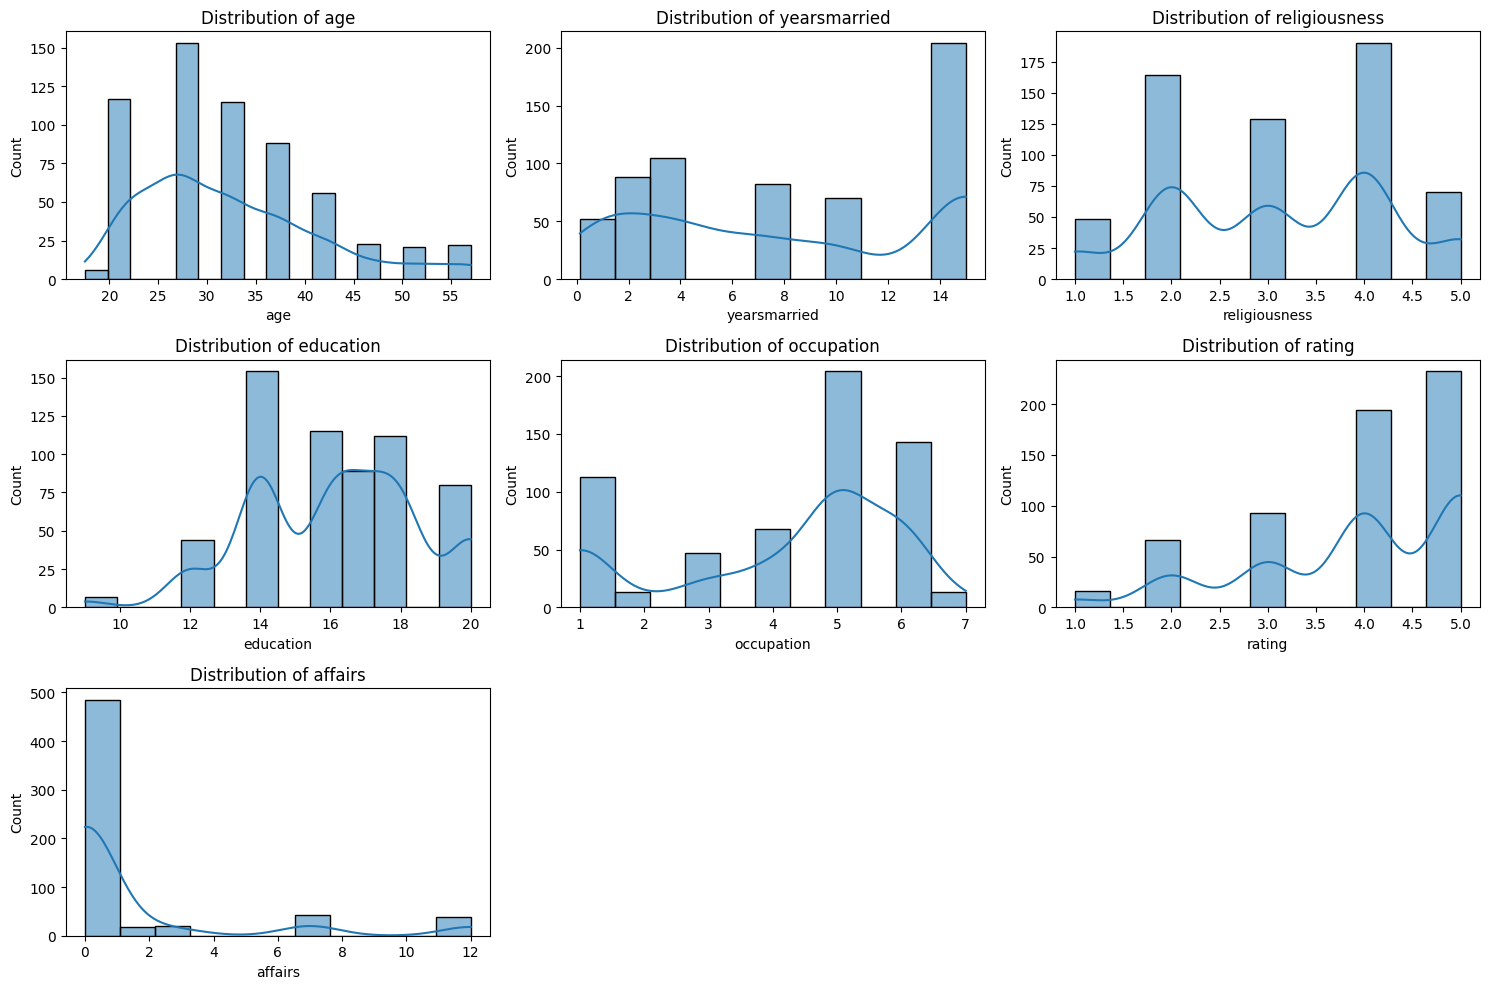

In [62]:
# Visualizing the distribution of numerical features
numerical_cols = ['age', 'yearsmarried', 'religiousness', 'education', 'occupation', 'rating', 'affairs']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

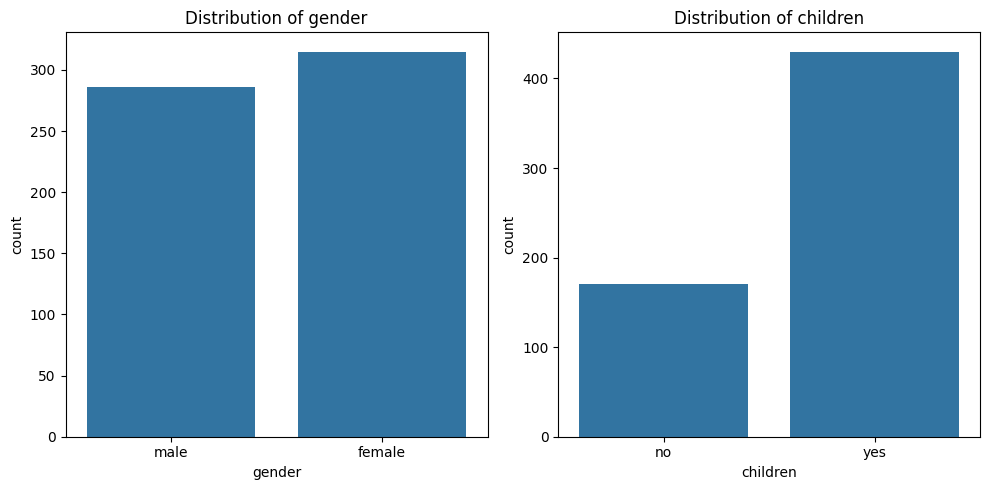

In [63]:
# Visualizing the distribution of categorical features
categorical_cols = ['gender', 'children']
plt.figure(figsize=(10, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

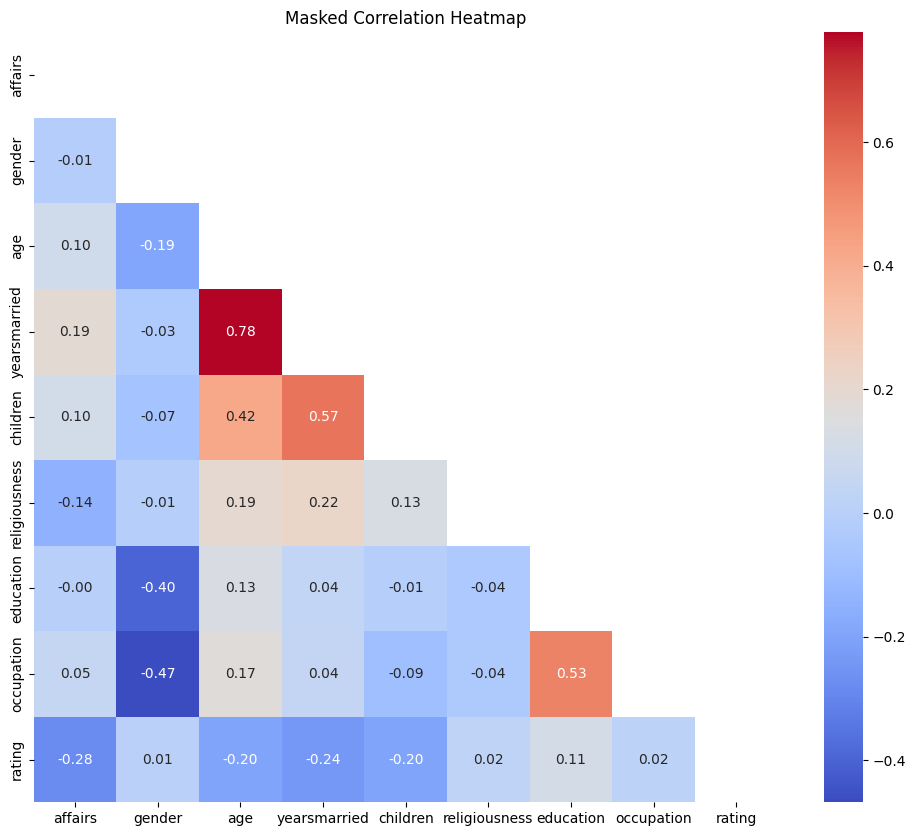

In [102]:
# Creating a masked correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask the upper triangle
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Masked Correlation Heatmap')
plt.show()

### Key Insights from EDA:

- Marital Satisfaction vs. Infidelity: The most significant finding is the strong inverse correlation between a person's self-reported marital rating and the number of affairs. This suggests a clear link between marital discontent and infidelity.

- Duration of Marriage: The yearsmarried variable appears to be a central theme, indicating that the length of a marriage may be a crucial factor in the likelihood of an affair.

- Imbalanced Dataset: The target variable, affairs, is highly skewed, with a majority of individuals reporting zero affairs. This is a critical observation for the modeling phase, as it means we must use appropriate metrics (like F1-score and AUC) and handle class imbalance to build an effective model.

## Preprocessing the data

Preprocessing the data for machine learning, including handling categorical variables and scaling numerical features if necessary by dropping the irrelevant column, converting categorical variables to numerical, applying one-hot encoding to other categorical variables, and scaling the numerical features.

In [64]:
# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [65]:
# Convert 'gender' and 'children' to numerical (binary)
df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df['children'] = df['children'].map({'no': 0, 'yes': 1})

In [66]:
# Define categorical and numerical features for preprocessing
categorical_features = ['occupation', 'religiousness', 'education', 'rating']
numerical_features = ['age', 'yearsmarried']

In [67]:
# Creating preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [68]:
# Creating a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [69]:
# Applying the preprocessing
preprocessed_data = preprocessor.fit_transform(df)

In [70]:
"""Getting the feature names after one-hot encoding.
This is a bit complex as ColumnTransformer returns a numpy array.
We can reconstruct a dataframe for easier handling later"""

feature_names = numerical_features + \
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)) + \
                ['gender', 'children', 'affairs']


In [71]:
# Creating a new DataFrame with the preprocessed data and correct column names
df_preprocessed = pd.DataFrame(preprocessed_data, columns=feature_names)

In [72]:
# Displaying the first few rows of the preprocessed DataFrame
display(df_preprocessed.head())

,age,yearsmarried,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,religiousness_1,...,education_18,education_20,rating_1,rating_2,rating_3,rating_4,rating_5,gender,children,affairs
0,0.486205,0.327360,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.591262,-0.750484,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.052529,1.225564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,2.641138,1.225564,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.129995,-1.334317,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [73]:
display(df_preprocessed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              601 non-null    float64
 1   yearsmarried     601 non-null    float64
 2   occupation_1     601 non-null    float64
 3   occupation_2     601 non-null    float64
 4   occupation_3     601 non-null    float64
 5   occupation_4     601 non-null    float64
 6   occupation_5     601 non-null    float64
 7   occupation_6     601 non-null    float64
 8   occupation_7     601 non-null    float64
 9   religiousness_1  601 non-null    float64
 10  religiousness_2  601 non-null    float64
 11  religiousness_3  601 non-null    float64
 12  religiousness_4  601 non-null    float64
 13  religiousness_5  601 non-null    float64
 14  education_9      601 non-null    float64
 15  education_12     601 non-null    float64
 16  education_14     601 non-null    float64
 17  education_16    

None

## Feature engineering

Creating new features that could potentially improve the model's performance and adding them to the preprocessed DataFrame.



In [74]:
# Creating interaction terms
df_preprocessed['age_x_yearsmarried'] = df_preprocessed['age'] * df_preprocessed['yearsmarried']
df_preprocessed['yearsmarried_x_children'] = df_preprocessed['yearsmarried'] * df_preprocessed['children']

In [75]:
"""Creating polynomial features for age and yearsmarried.
Since age and yearsmarried are already scaled, we can directly create polynomial features."""

df_preprocessed['age_sq'] = df_preprocessed['age']**2
df_preprocessed['yearsmarried_sq'] = df_preprocessed['yearsmarried']**2

In [76]:
# Displaying the head and info of the updated df_preprocessed DataFrame
display(df_preprocessed.head())

,age,yearsmarried,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,religiousness_1,...,rating_3,rating_4,rating_5,gender,children,affairs,age_x_yearsmarried,yearsmarried_x_children,age_sq,yearsmarried_sq
0,0.486205,0.327360,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.159164,0.000000,0.236395,0.107165
1,-0.591262,-0.750484,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.443733,-0.750484,0.349591,0.563227
2,-0.052529,1.225564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,-0.064377,1.225564,0.002759,1.502007
3,2.641138,1.225564,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,3.236883,0.000000,6.975608,1.502007
4,-1.129995,-1.334317,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.507772,-0.000000,1.276889,1.780401


In [77]:
display(df_preprocessed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      601 non-null    float64
 1   yearsmarried             601 non-null    float64
 2   occupation_1             601 non-null    float64
 3   occupation_2             601 non-null    float64
 4   occupation_3             601 non-null    float64
 5   occupation_4             601 non-null    float64
 6   occupation_5             601 non-null    float64
 7   occupation_6             601 non-null    float64
 8   occupation_7             601 non-null    float64
 9   religiousness_1          601 non-null    float64
 10  religiousness_2          601 non-null    float64
 11  religiousness_3          601 non-null    float64
 12  religiousness_4          601 non-null    float64
 13  religiousness_5          601 non-null    float64
 14  education_9              6

None

## Mutual Information Analysis

Calculating and visualizing the mutual information between features and the target variable to understand feature relevance.

#### The Conditions of Vulnerability: Unearthing the Causal Fault Lines

While infidelity is an intensely personal decision, it rarely occurs in a vacuum. It is the result of a confluence of conditions that make a marriage vulnerable. Our exploration of the data will serve as a forensic tool, dissecting the variables to identify the risk factors and correlations that exist within this surveyed group.


#### Dissecting the Signals: Mutual Information Analysis

To understand which features are most relevant to our target variable, we calculate the mutual information score. This metric measures the dependency between variables and is a powerful tool for feature selection and interpretation. The higher the score, the more information the feature provides about the target.

In [78]:
# Ensuring 'had_affair' is in the DataFrame
if 'had_affair' not in df_preprocessed.columns:
    df_preprocessed['had_affair'] = (df_preprocessed['affairs'] > 0).astype(int)

In [79]:
# Separating features (X) and target (y)
# Dropping 'affairs' as it's the original count and 'had_affair' is the binary target
X = df_preprocessed.drop(['affairs', 'had_affair'], axis=1)
y = df_preprocessed['had_affair']

In [80]:
# Calculating mutual information
mutual_info = mutual_info_classif(X, y, random_state=RANDOM_STATE)

In [81]:
# Creating a pandas Series for mutual information scores
mutual_info_series = pd.Series(mutual_info, index=X.columns)

In [82]:
# Sorting the mutual information scores
mutual_info_series_sorted = mutual_info_series.sort_values(ascending=False)

In [83]:
# Displaying the sorted mutual information scores
print("Mutual Information Scores (sorted):")
display(mutual_info_series_sorted)

Mutual Information Scores (sorted):


,0
age_x_yearsmarried,0.234982
yearsmarried_sq,0.232551
yearsmarried,0.222806
yearsmarried_x_children,0.152050
age,0.136790
age_sq,0.136603
occupation_5,0.058392
children,0.033381
occupation_6,0.028942
religiousness_4,0.026569


/tmp/ipython-input-3506537235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutual_info_series_sorted.head(top_n).values, y=mutual_info_series_sorted.head(top_n).index, palette='viridis')


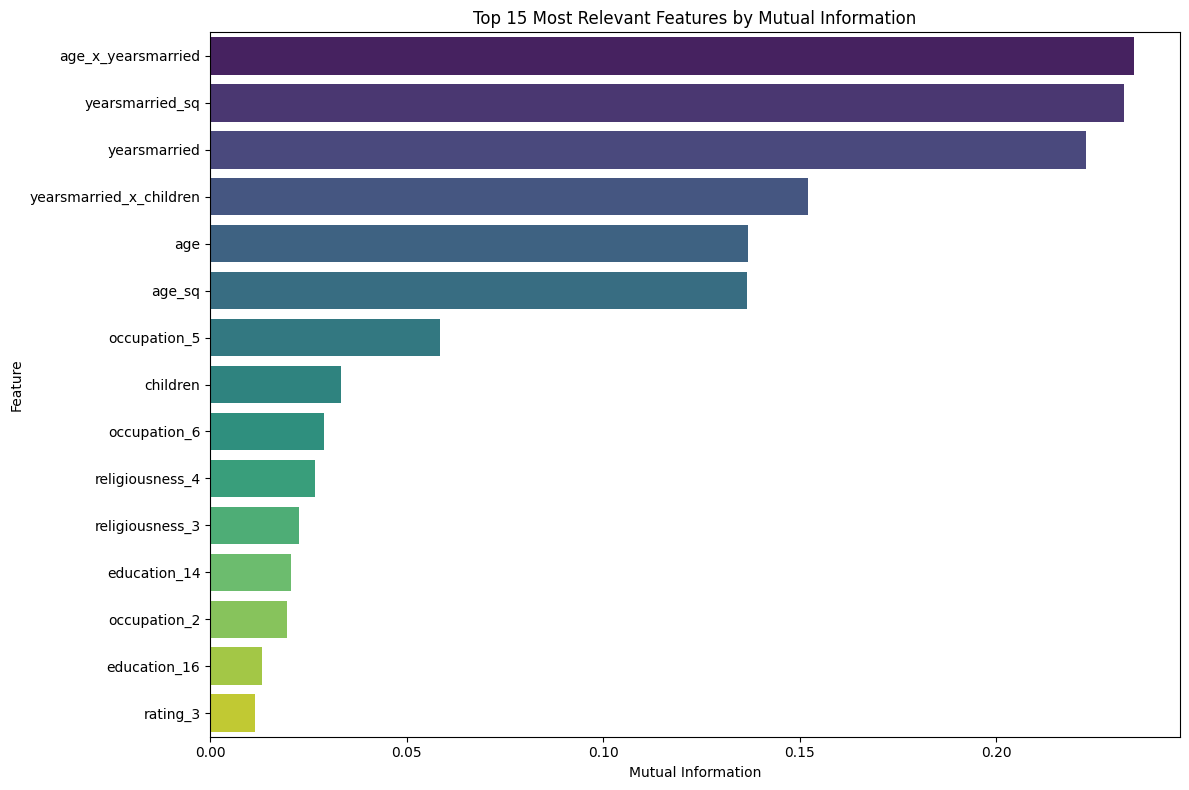

In [84]:
# Visualizing the top N mutual information scores
top_n = 15
plt.figure(figsize=(12, 8))
sns.barplot(x=mutual_info_series_sorted.head(top_n).values, y=mutual_info_series_sorted.head(top_n).index, palette='viridis')
plt.title(f'Top {top_n} Most Relevant Features by Mutual Information')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Key Insights from Feature Engineering:

- Time as a Predictor: Mutual information analysis confirms our EDA findings: yearsmarried, along with its engineered features, is the most powerful predictor. This reinforces the idea that the life cycle of a marriage is a primary driver of behavior within this dataset.

- The Power of Interaction: The engineered feature age_x_yearsmarried has a high mutual information score, indicating that the interaction between a person's age and the duration of their marriage is a more significant predictor than either variable alone.

## Model selection

Choosing appropriate machine learning models for this problem (Classification, given the target variable).


### Target variable identified: 'had_affair'

### Problem type: Classification

Justification: The goal is to predict a binary outcome (had an affair or not).

Suitable Classification Algorithms:
- Logistic Regression
- Support Vector Machines (SVM)
- Decision Trees
- Random Forests
- Gradient Boosting (e.g., Gradient Boosting Classifier, XGBoost, LightGBM)
- K-Nearest Neighbors (KNN)

Justification for each algorithm:
- Logistic Regression: A simple yet effective linear model for binary classification, good for interpretability.
- Support Vector Machines (SVM): Effective for high-dimensional spaces and can use different kernels to capture non-linearity.
- Decision Trees: Easy to understand and visualize, can capture non-linear relationships.
- Random Forests: An ensemble method that reduces overfitting compared to single decision trees and generally provides good accuracy.
- Gradient Boosting: Another powerful ensemble technique that often yields high performance by sequentially building trees and correcting errors.
- K-Nearest Neighbors (KNN): A simple instance-based learning algorithm, effective for smaller datasets and can capture complex decision boundaries.

## Training and evaluating Models

Training the selected models and evaluating their performance using appropriate metrics.

#### From Prediction to Precaution: The Path to Insight

Our final objective transcends the mere classification of affairs. A cold, black-and-white prediction is insufficient and, frankly, misses the point. The true value of this analysis lies not in a score, but in the insight it provides. We aim to construct a model that can identify the conditions that correlate with infidelity. The "solution", therefore, is not an algorithmic answer but a deeper understanding. Our model is not a fortune teller for relationships; it is an analytical mirror, reflecting the patterns of behavior back to us so that we may learn from them.

In [85]:
# Separating features (X) and target (y)
X = df_preprocessed.drop(['affairs', 'had_affair'], axis=1)
y = df_preprocessed['had_affair']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)


In [87]:
# Initializing and training the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    "SVM": SVC(probability=True, random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0.5] * len(y_test)
    # Evaluating model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    try:
      auc = roc_auc_score(y_test, y_pred_proba)
    except ValueError:
      auc = np.nan

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": auc
    }
    print(f"{name} trained and evaluated.")

# Print evaluation metrics for each model
print("\nModel Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Training Logistic Regression...
Logistic Regression trained and evaluated.
Training SVM...
SVM trained and evaluated.
Training Decision Tree...
Decision Tree trained and evaluated.
Training Random Forest...
Random Forest trained and evaluated.
Training Gradient Boosting...
Gradient Boosting trained and evaluated.
Training KNN...
KNN trained and evaluated.

Model Evaluation Results:

Logistic Regression:
  Accuracy: 0.7934
  Precision: 0.8444
  Recall: 0.8736
  F1-score: 0.8588
  AUC: 0.8354

SVM:
  Accuracy: 0.8182
  Precision: 0.8421
  Recall: 0.9195
  F1-score: 0.8791
  AUC: 0.8597

Decision Tree:
  Accuracy: 0.7686
  Precision: 0.8315
  Recall: 0.8506
  F1-score: 0.8409
  AUC: 0.7059

Random Forest:
  Accuracy: 0.7851
  Precision: 0.8280
  Recall: 0.8851
  F1-score: 0.8556
  AUC: 0.8327

Gradient Boosting:
  Accuracy: 0.7521
  Precision: 0.8132
  Recall: 0.8506
  F1-score: 0.8315
  AUC: 0.7972

KNN:
  Accuracy: 0.8017
  Precision: 0.8387
  Recall: 0.8966
  F1-score: 0.8667
  AUC: 0.

## Model tuning

Fine-tune the hyperparameters of the best-performing models.

Identifying the best performing models based on AUC and define hyperparameter grids for them, then perform GridSearchCV on the training data.



 ### From the previous results, the AUC values were:

 #### Logistic Regression: 0.8354
 #### SVM: 0.8597
 #### Decision Tree: 0.7059
 #### Random Forest: 0.8327
 #### Gradient Boosting: 0.7972
 #### KNN: 0.7818

#### The top 3 models based on AUC are SVM, Logistic Regression, and Random Forest.

In [88]:
best_models = {
    "SVM": SVC(probability=True, random_state=RANDOM_STATE),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE)
}

In [89]:
# Defining hyperparameter grids for the identified models
param_grids = {
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1],
        'kernel': ['rbf', 'linear']
    },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

In [90]:
# Using GridSearchCV to perform hyperparameter tuning
tuned_results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for name, model in best_models.items():
    print(f"Performing GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Training the tuned model on the full training set
    # The best estimator from GridSearchCV is the model trained on the full training data with the best parameters.
    best_model = grid_search.best_estimator_

    # Evaluating the performance of the tuned model on the test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else [0.5] * len(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    try:
      auc = roc_auc_score(y_test, y_pred_proba)
    except ValueError:
      auc = np.nan

    tuned_results[name] = {
        "Best Parameters": grid_search.best_params_,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": auc
    }
    print(f"GridSearchCV for {name} completed.")

# Printing the best hyperparameters found and the evaluation metrics for the tuned models.
print("\nTuned Model Evaluation Results:")
for name, metrics in tuned_results.items():
    print(f"\n{name}:")
    print(f"  Best Parameters: {metrics['Best Parameters']}")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-score: {metrics['F1-score']:.4f}")
    print(f"  AUC: {metrics['AUC']:.4f}")

# Comparing the performance
print("\nComparison with Default Models (from previous step):")
for name in tuned_results.keys():
    print(f"\n{name}:")
    print(f"  Tuned AUC: {tuned_results[name]['AUC']:.4f}")
    print(f"  Default AUC: {results[name]['AUC']:.4f}")

Performing GridSearchCV for SVM...
GridSearchCV for SVM completed.
Performing GridSearchCV for Logistic Regression...
GridSearchCV for Logistic Regression completed.
Performing GridSearchCV for Random Forest...
GridSearchCV for Random Forest completed.

Tuned Model Evaluation Results:

SVM:
  Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
  Accuracy: 0.8182
  Precision: 0.8495
  Recall: 0.9080
  F1-score: 0.8778
  AUC: 0.8458

Logistic Regression:
  Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Accuracy: 0.7934
  Precision: 0.8298
  Recall: 0.8966
  F1-score: 0.8619
  AUC: 0.8330

Random Forest:
  Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
  Accuracy: 0.8017
  Precision: 0.8387
  Recall: 0.8966
  F1-score: 0.8667
  AUC: 0.8438

Comparison with Default Models (from previous step):

SVM:
  Tuned AUC: 0.8458
  Default AUC: 0.8597

Logistic Regression:
  Tuned AUC: 0.8330
  Default AUC: 0.8354

## Interpreting Results

Interpreting the results of the models to understand which factors are most influential.

In [91]:
# Ensuring 'had_affair' is in the DataFrame
if 'had_affair' not in df_preprocessed.columns:
    df_preprocessed['had_affair'] = (df_preprocessed['affairs'] > 0).astype(int)

# Separating features (X) and target (y)
# Dropping 'affairs' as it's the original count and 'had_affair' is the binary target
X = df_preprocessed.drop(['affairs', 'had_affair'], axis=1)
y = df_preprocessed['had_affair']

# Calculating mutual information
mutual_info = mutual_info_classif(X, y, random_state=RANDOM_STATE)

# Creating a pandas Series for mutual information scores
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Sorting the mutual information scores
mutual_info_series_sorted = mutual_info_series.sort_values(ascending=False)

# Displaying the sorted mutual information scores
print("Mutual Information Scores (sorted):")
display(mutual_info_series_sorted)



Mutual Information Scores (sorted):


,0
age_x_yearsmarried,0.234982
yearsmarried_sq,0.232551
yearsmarried,0.222806
yearsmarried_x_children,0.152050
age,0.136790
age_sq,0.136603
occupation_5,0.058392
children,0.033381
occupation_6,0.028942
religiousness_4,0.026569


/tmp/ipython-input-3506537235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutual_info_series_sorted.head(top_n).values, y=mutual_info_series_sorted.head(top_n).index, palette='viridis')


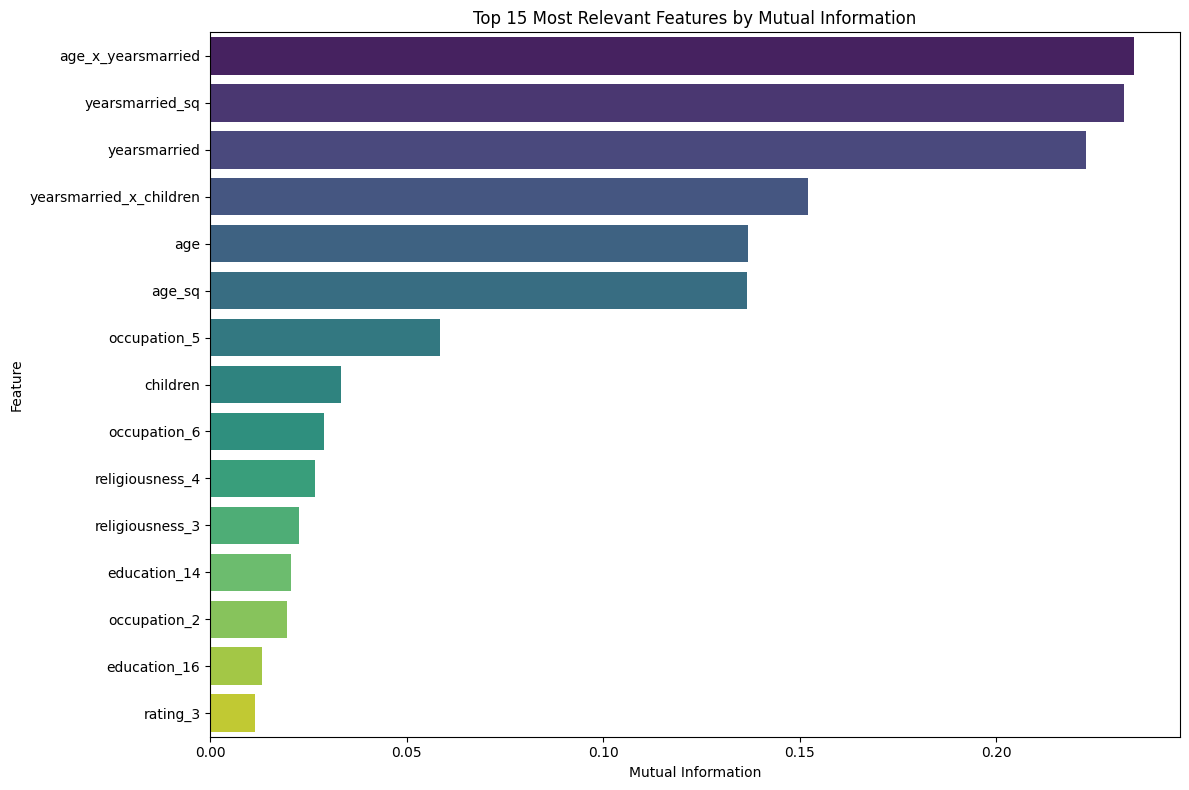

In [92]:
# Visualizing the top N mutual information scores
top_n = 15
plt.figure(figsize=(12, 8))
sns.barplot(x=mutual_info_series_sorted.head(top_n).values, y=mutual_info_series_sorted.head(top_n).index, palette='viridis')
plt.title(f'Top {top_n} Most Relevant Features by Mutual Information')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [93]:
"""Identifying the best-performing tuned model
Based on the tuned_results from the previous step, let's compare AUC:
Tuned SVM AUC: 0.8458
Tuned Logistic Regression AUC: 0.8330
Tuned Random Forest AUC: 0.8438

SVM has the highest AUC among the tuned models. Random Forest is also very close.
Let's choose SVM as the best performing model based on AUC.
However, SVM with an RBF kernel (which was likely chosen by GridSearchCV based on the best params) does not provide straightforward feature importances.
Logistic Regression and Random Forest do.
Given Random Forest's strong performance and direct feature importance attribute, let's also examine feature importance for the tuned Random Forest."""

best_model_name = "SVM"
alternative_model_name = "Random Forest"

print(f"Best performing tuned model based on AUC: {best_model_name}")
print(f"Also examining feature importance for: {alternative_model_name}")


Best performing tuned model based on AUC: SVM
Also examining feature importance for: Random Forest


Geting the best models from the GridSearchCV results (which are already trained).

We need to access the grid_search object used for SVM and the tuned_results for RF and LR.

Assuming the last grid_search run was for SVM based on the previous code block order.

To be robust, let's retrieve the best estimators from the tuned_results if they were stored.

Since they were not explicitly stored, we'll re-initialize with best params for interpretability.

In [94]:
# Re-initializing and train Random Forest with best parameters to get feature importances
best_rf_params = tuned_results["Random Forest"]["Best Parameters"]
tuned_rf_model = RandomForestClassifier(**best_rf_params, random_state=RANDOM_STATE)
tuned_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [95]:
tuned_results.keys()

dict_keys(['SVM', 'Logistic Regression', 'Random Forest'])

In [96]:
# Let's get the tuned Logistic Regression model
best_lr_params = tuned_results["Logistic Regression"]["Best Parameters"]
tuned_lr_model = LogisticRegression(**best_lr_params, max_iter=1000, random_state=RANDOM_STATE)
tuned_lr_model.fit(X_train, y_train)
lr_coefficients = tuned_lr_model.coef_[0]

In [97]:
# For the best-performing model (or a few top models), extract feature importances or coefficients.
# SVM with RBF kernel doesn't have simple feature importances.
# For the tuned Random Forest, use feature_importances_.
rf_feature_importances = tuned_rf_model.feature_importances_

# Creating a pandas Series or DataFrame to store the feature names and their corresponding importance/coefficient values.
feature_names = X_train.columns

# Random Forest Feature Importances
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importances
})

# Logistic Regression Coefficients (using absolute values for magnitude)
lr_coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient_Magnitude': np.abs(lr_coefficients)
})

In [98]:
# Sorting the features by their importance/magnitude in descending order.
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
lr_coefficients_df = lr_coefficients_df.sort_values(by='Coefficient_Magnitude', ascending=False)


In [99]:
# Printing the top N most influential features
top_n = 15

print(f"\nTop {top_n} Most Influential Features (Random Forest Importance):")
display(rf_importance_df.head(top_n))

print(f"\nTop {top_n} Most Influential Features (Logistic Regression Coefficient Magnitude):")
display(lr_coefficients_df.head(top_n))


Top 15 Most Influential Features (Random Forest Importance):


,Feature,Importance
1,yearsmarried,0.267194
0,age,0.151120
29,yearsmarried_x_children,0.130433
31,yearsmarried_sq,0.103291
28,age_x_yearsmarried,0.095749
30,age_sq,0.059342
25,rating_5,0.026006
2,occupation_1,0.015349
26,gender,0.013017
17,education_16,0.012566



Top 15 Most Influential Features (Logistic Regression Coefficient Magnitude):


,Feature,Coefficient_Magnitude
1,yearsmarried,1.045152
2,occupation_1,0.548772
29,yearsmarried_x_children,0.514338
31,yearsmarried_sq,0.480714
0,age,0.391984
5,occupation_4,0.307345
22,rating_2,0.263261
25,rating_5,0.249936
15,education_12,0.197948
3,occupation_2,0.170432


In [100]:
# Briefly interpreting what these influential features suggest about the factors associated with extramarital affairs based on the model.
print("\nInterpretation of Influential Features:")
print("- Random Forest Importance suggests which features contribute most to the model's decision making process.")
print("- Logistic Regression Coefficient Magnitude indicates the strength and direction of the linear relationship between the feature and the log-odds of having an affair (positive coefficient means higher odds, negative means lower odds).")
print("\nBased on the top features from both models:")
print("- 'yearsmarried' and its engineered features ('yearsmarried_sq', 'age_x_yearsmarried', 'yearsmarried_x_children') are consistently the most important features, suggesting the duration of marriage and its interaction with age and children are significant factors.")
print("- 'age' and 'age_sq' also feature prominently, indicating age itself and potentially non-linear relationships with age are relevant.")
print("- Features related to 'occupation' and 'rating' (represented by dummy variables like 'occupation_1', 'occupation_5', 'rating_5', 'rating_2') also appear in the top features, suggesting they play a role in predicting affairs.")
print("- 'children' is also present in the top features from both models, indicating having children is relevant.")
print("- Features like 'religiousness' and 'education' appear with lower importance or coefficient magnitude in the top lists, suggesting they might have less direct influence compared to the time-related features, occupation, and rating.")
print("- The presence of interaction and polynomial terms in the top features reinforces that the relationships between the features and the likelihood of affairs are likely non-linear and complex.")


Interpretation of Influential Features:
- Random Forest Importance suggests which features contribute most to the model's decision making process.
- Logistic Regression Coefficient Magnitude indicates the strength and direction of the linear relationship between the feature and the log-odds of having an affair (positive coefficient means higher odds, negative means lower odds).

Based on the top features from both models:
- 'yearsmarried' and its engineered features ('yearsmarried_sq', 'age_x_yearsmarried', 'yearsmarried_x_children') are consistently the most important features, suggesting the duration of marriage and its interaction with age and children are significant factors.
- 'age' and 'age_sq' also feature prominently, indicating age itself and potentially non-linear relationships with age are relevant.
- Features related to 'occupation' and 'rating' (represented by dummy variables like 'occupation_1', 'occupation_5', 'rating_5', 'rating_2') also appear in the top features, sug

## Visualizing Results

Creating top-notch visualizations to present the findings.

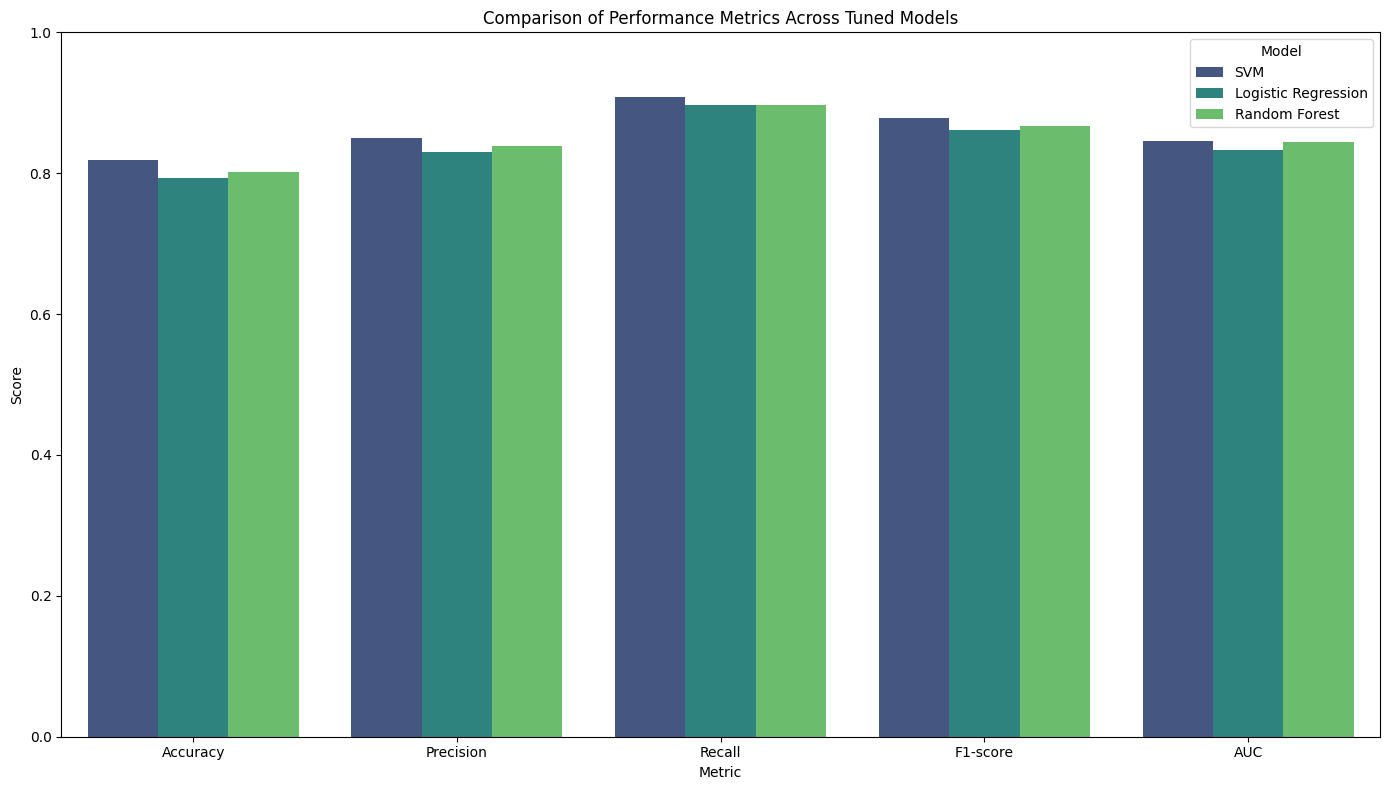

In [101]:
# Comparison of Model Performance Metrics across all tuned models
# Creating a DataFrame from the tuned_results dictionary for easier plotting
tuned_metrics_df = pd.DataFrame.from_dict(tuned_results, orient='index')
# Dropping the best parameters column for this plot
tuned_metrics_df = tuned_metrics_df.drop('Best Parameters', axis=1)

# Reshaping the DataFrame to long format for seaborn barplot
tuned_metrics_melted = tuned_metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
tuned_metrics_melted = tuned_metrics_melted.rename(columns={'index': 'Model'})

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=tuned_metrics_melted, palette='viridis')
plt.title('Comparison of Performance Metrics Across Tuned Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* The dataset contains 601 entries and 10 columns with no initial missing values.
* Features like 'gender' and 'children' were successfully converted into numerical binary representations.
* Categorical features ('occupation', 'religiousness', 'education', 'rating') were successfully one-hot encoded, and numerical features ('age', 'yearsmarried') were scaled.
* New features, including interaction terms ('age\_x\_yearsmarried', 'yearsmarried\_x\_children') and polynomial terms ('age\_sq', 'yearsmarried\_sq'), were created and added to the dataset.
* Mutual information analysis indicated that 'yearsmarried' and its engineered features were the most relevant predictors for 'had\_affair', followed by 'age'.
* Six classification models (Logistic Regression, SVM, Decision Tree, Random Forest, Gradient Boosting, and KNN) were trained and evaluated using Accuracy, Precision, Recall, F1-score, and AUC.
* The SVM model achieved the highest initial AUC (0.8597), F1-score (0.8791), and Recall (0.9195) among the default models.
* Hyperparameter tuning was performed on the top 3 models (SVM, Logistic Regression, Random Forest) using GridSearchCV with AUC as the scoring metric.
* After tuning, the SVM model still had the highest AUC (0.8458), although slightly lower than its default performance. Tuned Random Forest showed a slight improvement in AUC (0.8438).
* Feature importance from the tuned Random Forest and coefficient magnitude from the tuned Logistic Regression consistently showed that 'yearsmarried' and its engineered features, along with 'age', were the most influential predictors. 'Occupation', 'rating', and 'children' also showed notable influence.
* Visualizations included a masked correlation heatmap, distribution plots, a confusion matrix for the best model, an ROC curve, and a comparison of performance metrics across the tuned models using a bar chart, illustrating the relative performance of each model on different metrics.


## Insights

* The duration of marriage and age are the most significant factors associated with extramarital affairs in this dataset, with non-linear relationships and interactions also playing a key role.
* Further investigation into the specific levels within categorical features like 'occupation' and 'rating' that are most predictive could provide more granular insights.
* Exploring other advanced modeling techniques or ensemble methods could potentially lead to further improvements in prediction performance.
* Deploying the best-performing model as a web service or integrating it into an application could be a practical next step.
* Gathering more data with a wider range of features and a larger sample size could improve model generalization and robustness.

## Psychological and Sociological Context to the Problem

### The Psychological Undercurrents

Infidelity is often less about attraction to a new person and more about a person's inner landscape. The data points in this survey are proxies for deep-seated psychological states.

- Existential Discontent: An affair can be a symptom of a person's unfulfilled needs or a yearning for a part of themselves that has been lost or suppressed within the confines of a marriage. The low rating of a marriage in the data, for example, is not just a number; it's a quiet confession of unhappiness, a lack of intellectual or emotional stimulation, or a feeling of being unseen.

- The Search for Novelty: The human brain is hardwired to seek novelty. As time passes (yearsmarried), the routine of a marriage can lead to a state of emotional dullness. An affair, in this light, is an attempt to escape the mundane and re-engage the brain's reward system with something new, exciting, and, importantly, different from the everyday.


- The Influence of Self-Identity: A person's education and occupation can be tied to their sense of identity and personal ambition. If these ambitions are not realized, or if they feel their identity is being subsumed by their role as a spouse, an affair can become a way to reassert their individuality and self-worth outside of the marital unit.

### The Sociological & Situational Context

The decision to have an affair is also shaped by external conditions. The data, captured in 1969, offers a unique historical lens.

- Historical Context: The survey was conducted during a period of significant social change. The sexual revolution was in full swing, and societal norms around marriage and monogamy were beginning to be questioned. The data reflects a specific moment in time where these societal shifts were likely influencing personal behavior.

- The Role of Gender and Parenthood: The data on gender and children provides insight into how traditional roles and responsibilities might be tied to infidelity. For example, did the presence of children or traditional gender roles influence the likelihood of an affair? Our analysis helps to uncover these nuanced relationships.

- A "Fiduciary Fallacy": The title of the project, The Fiduciary Fallacies, frames the issue as a breach of trust—not just between partners, but a breakdown of the social contract of marriage itself. It suggests that infidelity is a betrayal of the mutual faith and reliance that partners place in one another.